In [224]:
!pip install scipy
!pip install sklearn

In [229]:
pip install dmba

Note: you may need to restart the kernel to use updated packages.


In [225]:
pip install -U scikit-learn

  Using cached scikit_learn-1.1.1-cp39-cp39-win_amd64.whl (7.4 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.2
    Uninstalling scikit-learn-0.24.2:
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\lib\\site-packages\\scikit_learn-0.24.2.dist-info\\COPYING'
Consider using the `--user` option or check the permissions.



In [230]:
pip install mord

Note: you may need to restart the kernel to use updated packages.


In [226]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.24.2.


In [231]:
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_iris
from sklearn.utils.validation import check_is_fitted
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from dmba import classificationSummary
import numpy as np
import pandas as pd
import statsmodels.api as sm
from mord import LogisticIT
import matplotlib.pyplot as plt
import seaborn as sns
from dmba import classificationSummary, gainsChart, liftChart
from dmba.metric import AIC_score
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn import metrics
from sklearn.datasets import load_iris

In [232]:

#read with headers
df=pd.read_csv("C:/Yali/My Class/ADMN5016/Assignment/bank-additional/bank-additional/bank-additional.csv", header=None)
#display
print(df)

                                                      0
0     age;"job";"marital";"education";"default";"hou...
1     30;"blue-collar";"married";"basic.9y";"no";"ye...
2     39;"services";"single";"high.school";"no";"no"...
3     25;"services";"married";"high.school";"no";"ye...
4     38;"services";"married";"basic.9y";"no";"unkno...
...                                                 ...
4115  30;"admin.";"married";"basic.6y";"no";"yes";"y...
4116  39;"admin.";"married";"high.school";"no";"yes"...
4117  27;"student";"single";"high.school";"no";"no";...
4118  58;"admin.";"married";"high.school";"no";"no";...
4119  34;"management";"single";"high.school";"no";"y...

[4120 rows x 1 columns]


In [233]:
df.head(5)

,0
0,"age;""job"";""marital"";""education"";""default"";""hou..."
1,"30;""blue-collar"";""married"";""basic.9y"";""no"";""ye..."
2,"39;""services"";""single"";""high.school"";""no"";""no""..."
3,"25;""services"";""married"";""high.school"";""no"";""ye..."
4,"38;""services"";""married"";""basic.9y"";""no"";""unkno..."


In [234]:
# split column
df1=df[0].str.split(';',expand=True)
df1.head(5)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,age,"""job""","""marital""","""education""","""default""","""housing""","""loan""","""contact""","""month""","""day_of_week""",...,"""campaign""","""pdays""","""previous""","""poutcome""","""emp.var.rate""","""cons.price.idx""","""cons.conf.idx""","""euribor3m""","""nr.employed""","""y"""
1,30,"""blue-collar""","""married""","""basic.9y""","""no""","""yes""","""no""","""cellular""","""may""","""fri""",...,2,999,0,"""nonexistent""",-1.8,92.893,-46.2,1.313,5099.1,"""no"""
2,39,"""services""","""single""","""high.school""","""no""","""no""","""no""","""telephone""","""may""","""fri""",...,4,999,0,"""nonexistent""",1.1,93.994,-36.4,4.855,5191,"""no"""
3,25,"""services""","""married""","""high.school""","""no""","""yes""","""no""","""telephone""","""jun""","""wed""",...,1,999,0,"""nonexistent""",1.4,94.465,-41.8,4.962,5228.1,"""no"""
4,38,"""services""","""married""","""basic.9y""","""no""","""unknown""","""unknown""","""telephone""","""jun""","""fri""",...,3,999,0,"""nonexistent""",1.4,94.465,-41.8,4.959,5228.1,"""no"""


In [235]:
df1

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,age,"""job""","""marital""","""education""","""default""","""housing""","""loan""","""contact""","""month""","""day_of_week""",...,"""campaign""","""pdays""","""previous""","""poutcome""","""emp.var.rate""","""cons.price.idx""","""cons.conf.idx""","""euribor3m""","""nr.employed""","""y"""
1,30,"""blue-collar""","""married""","""basic.9y""","""no""","""yes""","""no""","""cellular""","""may""","""fri""",...,2,999,0,"""nonexistent""",-1.8,92.893,-46.2,1.313,5099.1,"""no"""
2,39,"""services""","""single""","""high.school""","""no""","""no""","""no""","""telephone""","""may""","""fri""",...,4,999,0,"""nonexistent""",1.1,93.994,-36.4,4.855,5191,"""no"""
3,25,"""services""","""married""","""high.school""","""no""","""yes""","""no""","""telephone""","""jun""","""wed""",...,1,999,0,"""nonexistent""",1.4,94.465,-41.8,4.962,5228.1,"""no"""
4,38,"""services""","""married""","""basic.9y""","""no""","""unknown""","""unknown""","""telephone""","""jun""","""fri""",...,3,999,0,"""nonexistent""",1.4,94.465,-41.8,4.959,5228.1,"""no"""
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4115,30,"""admin.""","""married""","""basic.6y""","""no""","""yes""","""yes""","""cellular""","""jul""","""thu""",...,1,999,0,"""nonexistent""",1.4,93.918,-42.7,4.958,5228.1,"""no"""
4116,39,"""admin.""","""married""","""high.school""","""no""","""yes""","""no""","""telephone""","""jul""","""fri""",...,1,999,0,"""nonexistent""",1.4,93.918,-42.7,4.959,5228.1,"""no"""
4117,27,"""student""","""single""","""high.school""","""no""","""no""","""no""","""cellular""","""may""","""mon""",...,2,999,1,"""failure""",-1.8,92.893,-46.2,1.354,5099.1,"""no"""
4118,58,"""admin.""","""married""","""high.school""","""no""","""no""","""no""","""cellular""","""aug""","""fri""",...,1,999,0,"""nonexistent""",1.4,93.444,-36.1,4.966,5228.1,"""no"""


In [236]:
df1.columns = df1.iloc[0]

In [237]:
df1

,age,"""job""","""marital""","""education""","""default""","""housing""","""loan""","""contact""","""month""","""day_of_week""",...,"""campaign""","""pdays""","""previous""","""poutcome""","""emp.var.rate""","""cons.price.idx""","""cons.conf.idx""","""euribor3m""","""nr.employed""","""y"""
0,age,"""job""","""marital""","""education""","""default""","""housing""","""loan""","""contact""","""month""","""day_of_week""",...,"""campaign""","""pdays""","""previous""","""poutcome""","""emp.var.rate""","""cons.price.idx""","""cons.conf.idx""","""euribor3m""","""nr.employed""","""y"""
1,30,"""blue-collar""","""married""","""basic.9y""","""no""","""yes""","""no""","""cellular""","""may""","""fri""",...,2,999,0,"""nonexistent""",-1.8,92.893,-46.2,1.313,5099.1,"""no"""
2,39,"""services""","""single""","""high.school""","""no""","""no""","""no""","""telephone""","""may""","""fri""",...,4,999,0,"""nonexistent""",1.1,93.994,-36.4,4.855,5191,"""no"""
3,25,"""services""","""married""","""high.school""","""no""","""yes""","""no""","""telephone""","""jun""","""wed""",...,1,999,0,"""nonexistent""",1.4,94.465,-41.8,4.962,5228.1,"""no"""
4,38,"""services""","""married""","""basic.9y""","""no""","""unknown""","""unknown""","""telephone""","""jun""","""fri""",...,3,999,0,"""nonexistent""",1.4,94.465,-41.8,4.959,5228.1,"""no"""
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4115,30,"""admin.""","""married""","""basic.6y""","""no""","""yes""","""yes""","""cellular""","""jul""","""thu""",...,1,999,0,"""nonexistent""",1.4,93.918,-42.7,4.958,5228.1,"""no"""
4116,39,"""admin.""","""married""","""high.school""","""no""","""yes""","""no""","""telephone""","""jul""","""fri""",...,1,999,0,"""nonexistent""",1.4,93.918,-42.7,4.959,5228.1,"""no"""
4117,27,"""student""","""single""","""high.school""","""no""","""no""","""no""","""cellular""","""may""","""mon""",...,2,999,1,"""failure""",-1.8,92.893,-46.2,1.354,5099.1,"""no"""
4118,58,"""admin.""","""married""","""high.school""","""no""","""no""","""no""","""cellular""","""aug""","""fri""",...,1,999,0,"""nonexistent""",1.4,93.444,-36.1,4.966,5228.1,"""no"""


In [238]:
df2=df1.drop([0])

In [239]:
df2

,age,"""job""","""marital""","""education""","""default""","""housing""","""loan""","""contact""","""month""","""day_of_week""",...,"""campaign""","""pdays""","""previous""","""poutcome""","""emp.var.rate""","""cons.price.idx""","""cons.conf.idx""","""euribor3m""","""nr.employed""","""y"""
1,30,"""blue-collar""","""married""","""basic.9y""","""no""","""yes""","""no""","""cellular""","""may""","""fri""",...,2,999,0,"""nonexistent""",-1.8,92.893,-46.2,1.313,5099.1,"""no"""
2,39,"""services""","""single""","""high.school""","""no""","""no""","""no""","""telephone""","""may""","""fri""",...,4,999,0,"""nonexistent""",1.1,93.994,-36.4,4.855,5191,"""no"""
3,25,"""services""","""married""","""high.school""","""no""","""yes""","""no""","""telephone""","""jun""","""wed""",...,1,999,0,"""nonexistent""",1.4,94.465,-41.8,4.962,5228.1,"""no"""
4,38,"""services""","""married""","""basic.9y""","""no""","""unknown""","""unknown""","""telephone""","""jun""","""fri""",...,3,999,0,"""nonexistent""",1.4,94.465,-41.8,4.959,5228.1,"""no"""
5,47,"""admin.""","""married""","""university.degree""","""no""","""yes""","""no""","""cellular""","""nov""","""mon""",...,1,999,0,"""nonexistent""",-0.1,93.2,-42,4.191,5195.8,"""no"""
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4115,30,"""admin.""","""married""","""basic.6y""","""no""","""yes""","""yes""","""cellular""","""jul""","""thu""",...,1,999,0,"""nonexistent""",1.4,93.918,-42.7,4.958,5228.1,"""no"""
4116,39,"""admin.""","""married""","""high.school""","""no""","""yes""","""no""","""telephone""","""jul""","""fri""",...,1,999,0,"""nonexistent""",1.4,93.918,-42.7,4.959,5228.1,"""no"""
4117,27,"""student""","""single""","""high.school""","""no""","""no""","""no""","""cellular""","""may""","""mon""",...,2,999,1,"""failure""",-1.8,92.893,-46.2,1.354,5099.1,"""no"""
4118,58,"""admin.""","""married""","""high.school""","""no""","""no""","""no""","""cellular""","""aug""","""fri""",...,1,999,0,"""nonexistent""",1.4,93.444,-36.1,4.966,5228.1,"""no"""


In [240]:
print(df2.isnull().sum())

0
age                 0
"job"               0
"marital"           0
"education"         0
"default"           0
"housing"           0
"loan"              0
"contact"           0
"month"             0
"day_of_week"       0
"duration"          0
"campaign"          0
"pdays"             0
"previous"          0
"poutcome"          0
"emp.var.rate"      0
"cons.price.idx"    0
"cons.conf.idx"     0
"euribor3m"         0
"nr.employed"       0
"y"                 0
dtype: int64


In [241]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4119 entries, 1 to 4119
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age               4119 non-null   object
 1   "job"             4119 non-null   object
 2   "marital"         4119 non-null   object
 3   "education"       4119 non-null   object
 4   "default"         4119 non-null   object
 5   "housing"         4119 non-null   object
 6   "loan"            4119 non-null   object
 7   "contact"         4119 non-null   object
 8   "month"           4119 non-null   object
 9   "day_of_week"     4119 non-null   object
 10  "duration"        4119 non-null   object
 11  "campaign"        4119 non-null   object
 12  "pdays"           4119 non-null   object
 13  "previous"        4119 non-null   object
 14  "poutcome"        4119 non-null   object
 15  "emp.var.rate"    4119 non-null   object
 16  "cons.price.idx"  4119 non-null   object
 17  "cons.conf.idx

In [242]:
df2.iloc[:,10]

1       487
2       346
3       227
4        17
5        58
       ... 
4115     53
4116    219
4117     64
4118    528
4119    175
Name: "duration", Length: 4119, dtype: object

In [243]:
# drop"duration" column, because it is not suitable to include this column for prediction as described in the dataset
df3=df2.drop(['"duration"'], axis=1)

In [244]:
# Mothod two for drop columns
# df4=df2.drop(columns=['"duration"'])

In [245]:
df3

,age,"""job""","""marital""","""education""","""default""","""housing""","""loan""","""contact""","""month""","""day_of_week""","""campaign""","""pdays""","""previous""","""poutcome""","""emp.var.rate""","""cons.price.idx""","""cons.conf.idx""","""euribor3m""","""nr.employed""","""y"""
1,30,"""blue-collar""","""married""","""basic.9y""","""no""","""yes""","""no""","""cellular""","""may""","""fri""",2,999,0,"""nonexistent""",-1.8,92.893,-46.2,1.313,5099.1,"""no"""
2,39,"""services""","""single""","""high.school""","""no""","""no""","""no""","""telephone""","""may""","""fri""",4,999,0,"""nonexistent""",1.1,93.994,-36.4,4.855,5191,"""no"""
3,25,"""services""","""married""","""high.school""","""no""","""yes""","""no""","""telephone""","""jun""","""wed""",1,999,0,"""nonexistent""",1.4,94.465,-41.8,4.962,5228.1,"""no"""
4,38,"""services""","""married""","""basic.9y""","""no""","""unknown""","""unknown""","""telephone""","""jun""","""fri""",3,999,0,"""nonexistent""",1.4,94.465,-41.8,4.959,5228.1,"""no"""
5,47,"""admin.""","""married""","""university.degree""","""no""","""yes""","""no""","""cellular""","""nov""","""mon""",1,999,0,"""nonexistent""",-0.1,93.2,-42,4.191,5195.8,"""no"""
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4115,30,"""admin.""","""married""","""basic.6y""","""no""","""yes""","""yes""","""cellular""","""jul""","""thu""",1,999,0,"""nonexistent""",1.4,93.918,-42.7,4.958,5228.1,"""no"""
4116,39,"""admin.""","""married""","""high.school""","""no""","""yes""","""no""","""telephone""","""jul""","""fri""",1,999,0,"""nonexistent""",1.4,93.918,-42.7,4.959,5228.1,"""no"""
4117,27,"""student""","""single""","""high.school""","""no""","""no""","""no""","""cellular""","""may""","""mon""",2,999,1,"""failure""",-1.8,92.893,-46.2,1.354,5099.1,"""no"""
4118,58,"""admin.""","""married""","""high.school""","""no""","""no""","""no""","""cellular""","""aug""","""fri""",1,999,0,"""nonexistent""",1.4,93.444,-36.1,4.966,5228.1,"""no"""


In [246]:
df3.dtypes

0
age                 object
"job"               object
"marital"           object
"education"         object
"default"           object
"housing"           object
"loan"              object
"contact"           object
"month"             object
"day_of_week"       object
"campaign"          object
"pdays"             object
"previous"          object
"poutcome"          object
"emp.var.rate"      object
"cons.price.idx"    object
"cons.conf.idx"     object
"euribor3m"         object
"nr.employed"       object
"y"                 object
dtype: object

In [247]:
# Another way to convert object to int
# df3['age'].astype(int)

In [248]:
#Convert the datatype of some variables to numeric
df3[["age",'"campaign"','"pdays"','"previous"','"emp.var.rate"','"cons.price.idx"','"cons.conf.idx"','"euribor3m"','"nr.employed"']] = df3[["age",'"campaign"','"pdays"','"previous"','"emp.var.rate"','"cons.price.idx"','"cons.conf.idx"','"euribor3m"','"nr.employed"']].apply(pd.to_numeric)

In [249]:
df3.dtypes

0
age                   int64
"job"                object
"marital"            object
"education"          object
"default"            object
"housing"            object
"loan"               object
"contact"            object
"month"              object
"day_of_week"        object
"campaign"            int64
"pdays"               int64
"previous"            int64
"poutcome"           object
"emp.var.rate"      float64
"cons.price.idx"    float64
"cons.conf.idx"     float64
"euribor3m"         float64
"nr.employed"       float64
"y"                  object
dtype: object

In [250]:
# Test multicollinearity between predictors. Correlations between numeric IVs < 0.8
df3.corr()

,age,"""campaign""","""pdays""","""previous""","""emp.var.rate""","""cons.price.idx""","""cons.conf.idx""","""euribor3m""","""nr.employed"""
0,,,,,,,,,
age,1.000000,-0.014169,-0.043425,0.050931,-0.019192,-0.000482,0.098135,-0.015033,-0.041936
"""campaign""",-0.014169,1.000000,0.058742,-0.091490,0.176079,0.145021,0.007882,0.159435,0.161037
"""pdays""",-0.043425,0.058742,1.000000,-0.587941,0.270684,0.058472,-0.092090,0.301478,0.381983
"""previous""",0.050931,-0.091490,-0.587941,1.000000,-0.415238,-0.164922,-0.051420,-0.458851,-0.514853
"""emp.var.rate""",-0.019192,0.176079,0.270684,-0.415238,1.000000,0.755155,0.195022,0.970308,0.897173
"""cons.price.idx""",-0.000482,0.145021,0.058472,-0.164922,0.755155,1.000000,0.045835,0.657159,0.472560
"""cons.conf.idx""",0.098135,0.007882,-0.092090,-0.051420,0.195022,0.045835,1.000000,0.276595,0.107054
"""euribor3m""",-0.015033,0.159435,0.301478,-0.458851,0.970308,0.657159,0.276595,1.000000,0.942589
"""nr.employed""",-0.041936,0.161037,0.381983,-0.514853,0.897173,0.472560,0.107054,0.942589,1.000000


In [251]:
# drop"euribor3m" and "nr.employed" columns, because they are highly correlated with "emp.var.rate"	
df5=df3.drop(['"euribor3m"','"nr.employed"'], axis=1)

In [252]:
df4=df3['"pdays"']==0

In [253]:
df4.value_counts()

False    4117
True        2
Name: "pdays", dtype: int64

In [254]:
df5

,age,"""job""","""marital""","""education""","""default""","""housing""","""loan""","""contact""","""month""","""day_of_week""","""campaign""","""pdays""","""previous""","""poutcome""","""emp.var.rate""","""cons.price.idx""","""cons.conf.idx""","""y"""
1,30,"""blue-collar""","""married""","""basic.9y""","""no""","""yes""","""no""","""cellular""","""may""","""fri""",2,999,0,"""nonexistent""",-1.8,92.893,-46.2,"""no"""
2,39,"""services""","""single""","""high.school""","""no""","""no""","""no""","""telephone""","""may""","""fri""",4,999,0,"""nonexistent""",1.1,93.994,-36.4,"""no"""
3,25,"""services""","""married""","""high.school""","""no""","""yes""","""no""","""telephone""","""jun""","""wed""",1,999,0,"""nonexistent""",1.4,94.465,-41.8,"""no"""
4,38,"""services""","""married""","""basic.9y""","""no""","""unknown""","""unknown""","""telephone""","""jun""","""fri""",3,999,0,"""nonexistent""",1.4,94.465,-41.8,"""no"""
5,47,"""admin.""","""married""","""university.degree""","""no""","""yes""","""no""","""cellular""","""nov""","""mon""",1,999,0,"""nonexistent""",-0.1,93.200,-42.0,"""no"""
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4115,30,"""admin.""","""married""","""basic.6y""","""no""","""yes""","""yes""","""cellular""","""jul""","""thu""",1,999,0,"""nonexistent""",1.4,93.918,-42.7,"""no"""
4116,39,"""admin.""","""married""","""high.school""","""no""","""yes""","""no""","""telephone""","""jul""","""fri""",1,999,0,"""nonexistent""",1.4,93.918,-42.7,"""no"""
4117,27,"""student""","""single""","""high.school""","""no""","""no""","""no""","""cellular""","""may""","""mon""",2,999,1,"""failure""",-1.8,92.893,-46.2,"""no"""
4118,58,"""admin.""","""married""","""high.school""","""no""","""no""","""no""","""cellular""","""aug""","""fri""",1,999,0,"""nonexistent""",1.4,93.444,-36.1,"""no"""


In [255]:
df5.describe()

,age,"""campaign""","""pdays""","""previous""","""emp.var.rate""","""cons.price.idx""","""cons.conf.idx"""
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102
std,10.313362,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578
min,18.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000
25%,32.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000
50%,38.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000
75%,47.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000
max,88.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000


In [256]:
df5.corr()

,age,"""campaign""","""pdays""","""previous""","""emp.var.rate""","""cons.price.idx""","""cons.conf.idx"""
0,,,,,,,
age,1.000000,-0.014169,-0.043425,0.050931,-0.019192,-0.000482,0.098135
"""campaign""",-0.014169,1.000000,0.058742,-0.091490,0.176079,0.145021,0.007882
"""pdays""",-0.043425,0.058742,1.000000,-0.587941,0.270684,0.058472,-0.092090
"""previous""",0.050931,-0.091490,-0.587941,1.000000,-0.415238,-0.164922,-0.051420
"""emp.var.rate""",-0.019192,0.176079,0.270684,-0.415238,1.000000,0.755155,0.195022
"""cons.price.idx""",-0.000482,0.145021,0.058472,-0.164922,0.755155,1.000000,0.045835
"""cons.conf.idx""",0.098135,0.007882,-0.092090,-0.051420,0.195022,0.045835,1.000000


In [257]:
df5['"y"'].value_counts()

"no"     3668
"yes"     451
Name: "y", dtype: int64

In [258]:
# Convert output variable to binary variable
df5['"y"'] = [1 if status == '"yes"' else 0 for status in
df5['"y"']]

In [259]:
df5

,age,"""job""","""marital""","""education""","""default""","""housing""","""loan""","""contact""","""month""","""day_of_week""","""campaign""","""pdays""","""previous""","""poutcome""","""emp.var.rate""","""cons.price.idx""","""cons.conf.idx""","""y"""
1,30,"""blue-collar""","""married""","""basic.9y""","""no""","""yes""","""no""","""cellular""","""may""","""fri""",2,999,0,"""nonexistent""",-1.8,92.893,-46.2,0
2,39,"""services""","""single""","""high.school""","""no""","""no""","""no""","""telephone""","""may""","""fri""",4,999,0,"""nonexistent""",1.1,93.994,-36.4,0
3,25,"""services""","""married""","""high.school""","""no""","""yes""","""no""","""telephone""","""jun""","""wed""",1,999,0,"""nonexistent""",1.4,94.465,-41.8,0
4,38,"""services""","""married""","""basic.9y""","""no""","""unknown""","""unknown""","""telephone""","""jun""","""fri""",3,999,0,"""nonexistent""",1.4,94.465,-41.8,0
5,47,"""admin.""","""married""","""university.degree""","""no""","""yes""","""no""","""cellular""","""nov""","""mon""",1,999,0,"""nonexistent""",-0.1,93.200,-42.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4115,30,"""admin.""","""married""","""basic.6y""","""no""","""yes""","""yes""","""cellular""","""jul""","""thu""",1,999,0,"""nonexistent""",1.4,93.918,-42.7,0
4116,39,"""admin.""","""married""","""high.school""","""no""","""yes""","""no""","""telephone""","""jul""","""fri""",1,999,0,"""nonexistent""",1.4,93.918,-42.7,0
4117,27,"""student""","""single""","""high.school""","""no""","""no""","""no""","""cellular""","""may""","""mon""",2,999,1,"""failure""",-1.8,92.893,-46.2,0
4118,58,"""admin.""","""married""","""high.school""","""no""","""no""","""no""","""cellular""","""aug""","""fri""",1,999,0,"""nonexistent""",1.4,93.444,-36.1,0


In [260]:
df5['"y"'].value_counts()

0    3668
1     451
Name: "y", dtype: int64

In [261]:
catpredictors = ['"job"', '"marital"', '"education"', '"default"', '"housing"', '"loan"','"contact"','"month"','"day_of_week"','"poutcome"']

In [262]:
catpredictors

['"job"',
 '"marital"',
 '"education"',
 '"default"',
 '"housing"',
 '"loan"',
 '"contact"',
 '"month"',
 '"day_of_week"',
 '"poutcome"']

In [263]:
X = pd.get_dummies(df5[catpredictors], drop_first=True)
X

,"""job""_""blue-collar""","""job""_""entrepreneur""","""job""_""housemaid""","""job""_""management""","""job""_""retired""","""job""_""self-employed""","""job""_""services""","""job""_""student""","""job""_""technician""","""job""_""unemployed""",...,"""month""_""may""","""month""_""nov""","""month""_""oct""","""month""_""sep""","""day_of_week""_""mon""","""day_of_week""_""thu""","""day_of_week""_""tue""","""day_of_week""_""wed""","""poutcome""_""nonexistent""","""poutcome""_""success"""
1,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4115,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4116,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4117,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
4118,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [264]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4119 entries, 1 to 4119
Data columns (total 43 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   "job"_"blue-collar"                4119 non-null   uint8
 1   "job"_"entrepreneur"               4119 non-null   uint8
 2   "job"_"housemaid"                  4119 non-null   uint8
 3   "job"_"management"                 4119 non-null   uint8
 4   "job"_"retired"                    4119 non-null   uint8
 5   "job"_"self-employed"              4119 non-null   uint8
 6   "job"_"services"                   4119 non-null   uint8
 7   "job"_"student"                    4119 non-null   uint8
 8   "job"_"technician"                 4119 non-null   uint8
 9   "job"_"unemployed"                 4119 non-null   uint8
 10  "job"_"unknown"                    4119 non-null   uint8
 11  "marital"_"married"                4119 non-null   uint8
 12  "marital"_"single"  

In [265]:
y = df5['"y"']
y

1       0
2       0
3       0
4       0
5       0
       ..
4115    0
4116    0
4117    0
4118    0
4119    0
Name: "y", Length: 4119, dtype: int64

In [266]:
# split into training and validation
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4,
random_state=1)


In [267]:
len(df5)

4119

In [268]:
len(train_X)

2471

In [269]:
len(valid_X)

1648

In [270]:
logit_full = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
print(logit_full)

LogisticRegression(C=1e+42, solver='liblinear')


In [271]:
logit_full.fit(train_X, train_y)

LogisticRegression(C=1e+42, solver='liblinear')

In [272]:
print('intercept ', logit_full.intercept_[0])

intercept  -1.353645969554299


In [273]:
print(logit_full.coef_[0])

[-0.3629442  -0.76214863  0.11065574 -0.22971054  0.64463445 -0.28530064
 -0.19853408  0.72246018 -0.13503405 -0.00692399 -0.63344384 -0.03718163
 -0.03194305 -5.92639686 -0.09621947 -0.01630135 -0.0116903  -5.03133053
  0.20684007  0.12081161  0.22996378 -0.24213438 -4.42290976 -0.31710501
 -0.04975831 -0.31710501 -0.19605111 -1.25897346 -1.06609688  1.56406744
 -0.77481657  0.40195276  1.63982127 -0.59206843 -0.89263759  0.64451322
  0.62579058 -0.20883187 -0.08393016  0.00720093  0.02660406  0.10520577
  2.6480288 ]


In [274]:
print(pd.DataFrame({'coeff': logit_full.coef_[0]}, index=X.columns).transpose())

       "job"_"blue-collar"  "job"_"entrepreneur"  "job"_"housemaid"  \
coeff            -0.362944             -0.762149           0.110656   

       "job"_"management"  "job"_"retired"  "job"_"self-employed"  \
coeff           -0.229711         0.644634              -0.285301   

       "job"_"services"  "job"_"student"  "job"_"technician"  \
coeff         -0.198534          0.72246           -0.135034   

       "job"_"unemployed"  ...  "month"_"may"  "month"_"nov"  "month"_"oct"  \
coeff           -0.006924  ...      -0.592068      -0.892638       0.644513   

       "month"_"sep"  "day_of_week"_"mon"  "day_of_week"_"thu"  \
coeff       0.625791            -0.208832             -0.08393   

       "day_of_week"_"tue"  "day_of_week"_"wed"  "poutcome"_"nonexistent"  \
coeff             0.007201             0.026604                  0.105206   

       "poutcome"_"success"  
coeff              2.648029  

[1 rows x 43 columns]


In [275]:
print('AIC', AIC_score(valid_y, logit_full.predict(valid_X), df = len(train_X.columns)
+ 1))

AIC 954.062149518546


In [276]:
logit_reg_pred = logit_full.predict_proba(valid_X)
logit_reg_pred

array([[0.94140424, 0.05859576],
       [0.91906295, 0.08093705],
       [0.22896815, 0.77103185],
       ...,
       [0.92516505, 0.07483495],
       [0.89690931, 0.10309069],
       [0.91497975, 0.08502025]])

In [277]:
logit_reg_pred = logit_full.predict_proba(valid_X)
logit_reg_pred

array([[0.94140424, 0.05859576],
       [0.91906295, 0.08093705],
       [0.22896815, 0.77103185],
       ...,
       [0.92516505, 0.07483495],
       [0.89690931, 0.10309069],
       [0.91497975, 0.08502025]])

In [278]:
full_result = pd.DataFrame({'actual': valid_y, 
 'p(0)': [p[0] for p in logit_reg_pred],
 'p(1)': [p[1] for p in logit_reg_pred],
 'predicted': logit_full.predict(valid_X)})
full_result

,actual,p(0),p(1),predicted
3292,0,0.941404,0.058596,0
3979,0,0.919063,0.080937,0
3708,1,0.228968,0.771032,1
3240,0,0.878147,0.121853,0
2935,0,0.973213,0.026787,0
...,...,...,...,...
3002,0,0.961813,0.038187,0
1853,0,0.691267,0.308733,0
1098,0,0.925165,0.074835,0
1598,0,0.896909,0.103091,0


In [279]:
logit_reg_pred = logit_full.predict_proba(valid_X)
logit_reg_pred

full_result = pd.DataFrame({'actual': valid_y, 
 'p(0)': [p[0] for p in logit_reg_pred],
 'p(1)': [p[1] for p in logit_reg_pred],
 'predicted': logit_full.predict(valid_X)})
full_result = full_result.sort_values(by=['p(1)'], ascending=False)
full_result

,actual,p(0),p(1),predicted
2118,1,0.048633,0.951367,1
706,1,0.058959,0.941041,1
2295,0,0.070523,0.929477,1
22,1,0.070525,0.929475,1
2264,1,0.071362,0.928638,1
...,...,...,...,...
2799,0,0.999652,0.000348,0
1645,1,0.999709,0.000291,0
1858,0,0.999778,0.000222,0
3179,0,0.999800,0.000200,0


In [280]:
full_result['actual'].value_counts()

0    1476
1     172
Name: actual, dtype: int64

In [281]:
full_result['predicted'].value_counts()

0    1579
1      69
Name: predicted, dtype: int64

In [282]:
cm = confusion_matrix(full_result.actual, full_result.predicted)
cm

array([[1446,   30],
       [ 133,   39]], dtype=int64)

In [283]:
Accuracy_valid = (1446+39)/(1446+30+133+39)
Accuracy_valid

0.9010922330097088

In [284]:
# confusion matrix
classificationSummary(full_result.actual, full_result.predicted, class_names= ['No', 'Yes'])

Confusion Matrix (Accuracy 0.9011)

       Prediction
Actual   No  Yes
    No 1446   30
   Yes  133   39


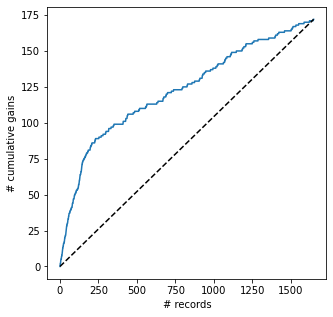

In [285]:
gainsChart(full_result.actual, figsize=[5, 5])
plt.show()

Training dataset

In [286]:
logit_reg_pred_train = logit_full.predict_proba(train_X)
logit_reg_pred_train

array([[0.94079663, 0.05920337],
       [0.91942058, 0.08057942],
       [0.91832154, 0.08167846],
       ...,
       [0.84182823, 0.15817177],
       [0.83221716, 0.16778284],
       [0.93692473, 0.06307527]])

In [287]:
full_result_train = pd.DataFrame({'actual': train_y, 
 'p(0)': [p[0] for p in logit_reg_pred_train],
 'p(1)': [p[1] for p in logit_reg_pred_train],
 'predicted': logit_full.predict(train_X)})
full_result_train

,actual,p(0),p(1),predicted
2681,0,0.940797,0.059203,0
2194,0,0.919421,0.080579,0
2405,0,0.918322,0.081678,0
1833,0,0.947760,0.052240,0
1366,0,0.898616,0.101384,0
...,...,...,...,...
2896,0,0.949218,0.050782,0
2764,1,0.932364,0.067636,0
906,0,0.841828,0.158172,0
3981,1,0.832217,0.167783,0


In [288]:
full_result_train = pd.DataFrame({'actual': train_y, 
 'p(0)': [p[0] for p in logit_reg_pred_train],
 'p(1)': [p[1] for p in logit_reg_pred_train],
 'predicted': logit_full.predict(train_X)})
full_result_train = full_result_train.sort_values(by=['p(1)'], ascending=False)
full_result_train

,actual,p(0),p(1),predicted
3211,1,0.028150,0.971850,1
179,1,0.041510,0.958490,1
1714,1,0.048314,0.951686,1
3520,1,0.051219,0.948781,1
478,1,0.059708,0.940292,1
...,...,...,...,...
3515,0,0.998792,0.001208,0
883,0,0.999755,0.000245,0
2548,0,0.999757,0.000243,0
273,0,0.999769,0.000231,0


In [289]:
full_result_train['actual'].value_counts()

0    2192
1     279
Name: actual, dtype: int64

In [290]:
full_result_train['predicted'].value_counts()

0    2376
1      95
Name: predicted, dtype: int64

In [291]:
cm = confusion_matrix(full_result_train.actual, full_result_train.predicted)
cm

array([[2160,   32],
       [ 216,   63]], dtype=int64)

In [292]:
Accuracy_train = (2160+63)/(2160+63+216+32)
Accuracy_train

0.8996357749898827

In [293]:
# confusion matrix
classificationSummary(full_result_train.actual, full_result_train.predicted, class_names= ['No', 'Yes'])

Confusion Matrix (Accuracy 0.8996)

       Prediction
Actual   No  Yes
    No 2160   32
   Yes  216   63


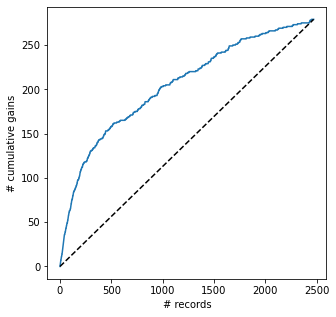

In [294]:
gainsChart(full_result_train.actual, figsize=[5, 5])
plt.show()

### Neural Networks method

In [295]:
Xneu = df5[catpredictors]
yneu = df5['"y"']

In [296]:
Xneu

,"""job""","""marital""","""education""","""default""","""housing""","""loan""","""contact""","""month""","""day_of_week""","""poutcome"""
1,"""blue-collar""","""married""","""basic.9y""","""no""","""yes""","""no""","""cellular""","""may""","""fri""","""nonexistent"""
2,"""services""","""single""","""high.school""","""no""","""no""","""no""","""telephone""","""may""","""fri""","""nonexistent"""
3,"""services""","""married""","""high.school""","""no""","""yes""","""no""","""telephone""","""jun""","""wed""","""nonexistent"""
4,"""services""","""married""","""basic.9y""","""no""","""unknown""","""unknown""","""telephone""","""jun""","""fri""","""nonexistent"""
5,"""admin.""","""married""","""university.degree""","""no""","""yes""","""no""","""cellular""","""nov""","""mon""","""nonexistent"""
...,...,...,...,...,...,...,...,...,...,...
4115,"""admin.""","""married""","""basic.6y""","""no""","""yes""","""yes""","""cellular""","""jul""","""thu""","""nonexistent"""
4116,"""admin.""","""married""","""high.school""","""no""","""yes""","""no""","""telephone""","""jul""","""fri""","""nonexistent"""
4117,"""student""","""single""","""high.school""","""no""","""no""","""no""","""cellular""","""may""","""mon""","""failure"""
4118,"""admin.""","""married""","""high.school""","""no""","""no""","""no""","""cellular""","""aug""","""fri""","""nonexistent"""


In [297]:
yneu

1       0
2       0
3       0
4       0
5       0
       ..
4115    0
4116    0
4117    0
4118    0
4119    0
Name: "y", Length: 4119, dtype: int64

In [298]:
classes = sorted(y.unique())
classes

[0, 1]

In [299]:
clf = MLPClassifier(hidden_layer_sizes=(3), activation='logistic',
solver='lbfgs', 
 random_state=1)

In [300]:
clf

MLPClassifier(activation='logistic', hidden_layer_sizes=3, random_state=1,
              solver='lbfgs')

In [301]:
clf.fit(train_X, train_y.values)

MLPClassifier(activation='logistic', hidden_layer_sizes=3, random_state=1,
              solver='lbfgs')

In [302]:
clf.predict(train_X)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [303]:
clf.predict(valid_X)

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [304]:
#  Network structure
print('Intercepts')
print(clf.intercepts_)
print('Weights')
print(clf.coefs_)

Intercepts
[array([  2.85551344, -32.40859456,  13.82997031]), array([-51.62339491])]
Weights
[array([[-1.13952974e+01, -6.98528614e+00, -3.16422989e+01],
       [-1.22944084e+01,  5.28679080e+01, -2.06459770e+01],
       [-5.03041319e-01,  2.99037604e+01,  3.80990774e+01],
       [-1.32783800e+01,  2.86392850e+01,  3.77819714e+00],
       [ 2.32367232e+00, -2.16802053e+01, -5.15435624e+00],
       [ 3.30324387e+01, -1.18459323e+01, -7.27934265e+01],
       [-7.00492609e+00,  1.06828918e+01, -1.55797385e+01],
       [ 2.58320363e+01, -4.80350251e+00, -2.04935385e+01],
       [ 2.15881852e+01,  4.10036550e+01,  3.43856770e+01],
       [-3.77417580e+00,  2.46199852e+01,  5.53820279e+01],
       [-1.20955254e-01, -1.24483531e+01, -7.23921579e+01],
       [ 1.08405630e+01,  3.72354944e+00, -2.72321696e+01],
       [-3.23648357e+01,  7.38687988e+00,  2.56416437e+01],
       [-2.59166069e+00,  3.55319367e+01, -3.26626592e+01],
       [ 4.66333968e+00,  6.29530222e+00,  3.52956549e+01],
     

In [305]:
classificationSummary(train_y, clf.predict(train_X), class_names=classes)

Confusion Matrix (Accuracy 0.9247)

       Prediction
Actual    0    1
     0 2170   22
     1  164  115


In [306]:
classificationSummary(valid_y, clf.predict(valid_X), class_names=classes)

Confusion Matrix (Accuracy 0.8890)

       Prediction
Actual    0    1
     0 1422   54
     1  129   43


In [307]:
clf1 = MLPClassifier(hidden_layer_sizes=(3), activation='logistic',
solver='lbfgs', 
 random_state=1,max_iter=12)

In [308]:
clf1.fit(train_X, train_y.values)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='logistic', hidden_layer_sizes=3, max_iter=12,
              random_state=1, solver='lbfgs')

In [309]:
classificationSummary(train_y, clf1.predict(train_X), class_names=classes)

Confusion Matrix (Accuracy 0.8972)

       Prediction
Actual    0    1
     0 2126   66
     1  188   91


In [310]:
classificationSummary(valid_y, clf1.predict(valid_X), class_names=classes)

Confusion Matrix (Accuracy 0.8890)

       Prediction
Actual    0    1
     0 1413   63
     1  120   52
